June: Order of process for new resolution.

In [30]:
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot

# 1. Realistic Bathymetry

[final_bathymetry.ipynb](http://nbviewer.jupyter.org/urls/bitbucket.org/CanyonsUBC/mackenzie_canyon/raw/tip/bathymetry/notebooks/final_bathymetry.ipynb)

* changed x_final and y_final (number of grid cells on x and y)
* smoothing takes really long (to do)

# 2. Idealized Bathymetry

[final_bathymetry.ipynb](http://nbviewer.jupyter.org/urls/bitbucket.org/CanyonsUBC/mackenzie_canyon/raw/tip/bathymetry/notebooks/final_bathymetry.ipynb)

* changed x_final and y_final (number of grid cells on x and y)

In [2]:
ideal_bathy_file = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_quad.nc')

(360, 480) (360, 480)


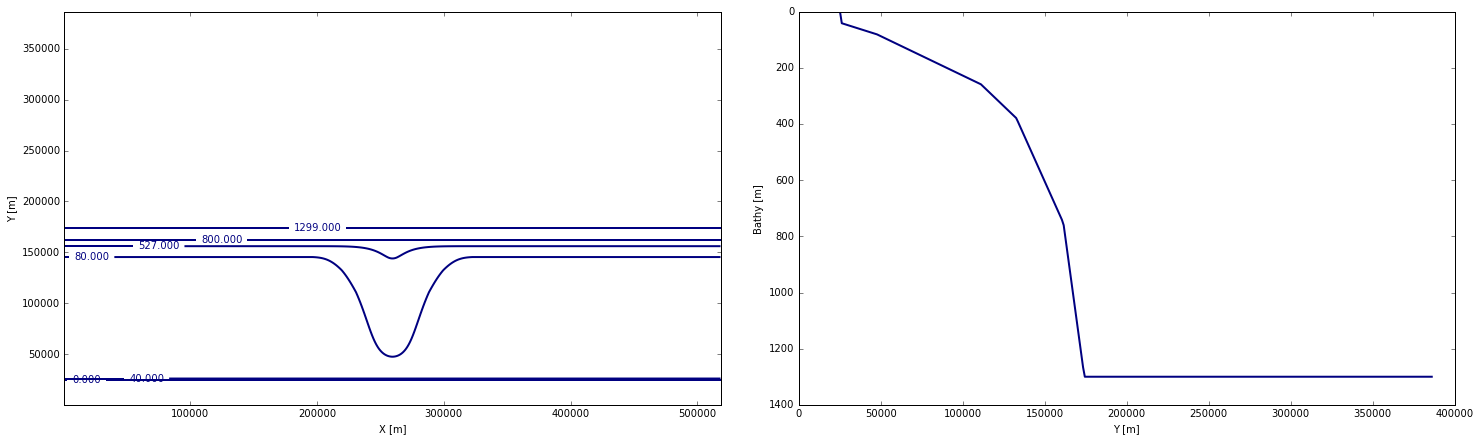

In [27]:
ibathy = ideal_bathy_file['Bathymetry'][:]
iX = ideal_bathy_file['X'][:]
iY = ideal_bathy_file['Y'][:]

print(iY.shape, ibathy.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plt.tight_layout(w_pad=5)
c1 = ax1.contour(iX, iY, ibathy, levels = [0, 40, 80, 527, 800, 1299], colors='Navy', linewidths=2)
ax1.clabel(c1, inline=1, fontsize=10)
ax1.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]')

ax2.plot(iY[:,240], ibathy[:,240], color='Navy', linewidth=2)
ax2.invert_yaxis()
ax2.set_xlabel('Y [m]')
ax2.set_ylabel('Bathy [m]')

# 3. Raw Grid

[final_bathymetry.ipynb](http://nbviewer.jupyter.org/urls/bitbucket.org/CanyonsUBC/mackenzie_canyon/raw/tip/bathymetry/notebooks/final_bathymetry.ipynb)

* changed x_final and y_final (number of grid cells on x and y)

In [3]:
grid_file = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/coordinates/raw_coordinates/grid_quad.nc')

(483, 363) (483, 363)


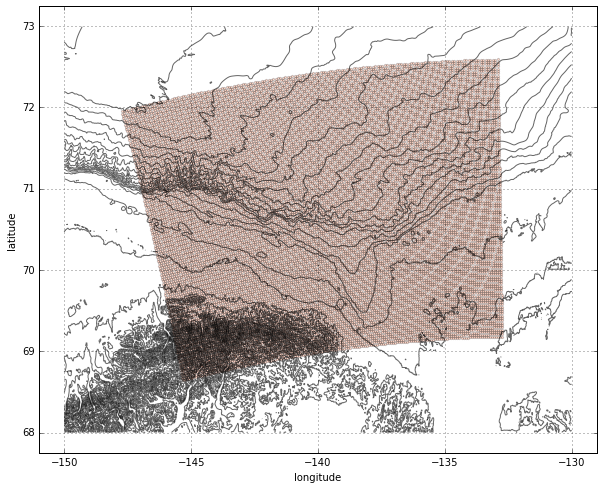

In [49]:
grid_lons = grid_file['grid_lons']
grid_lats = grid_file['grid_lats']

print(grid_lons.shape, grid_lats.shape)

x_region, y_region, z_region = functions_plot.def_regionG(-150, -130, 68, 73)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
fig, ax = functions_plot.plot_region(fig, ax, x_region, y_region, z_region)
ax.scatter(grid_lons[::3,::3], grid_lats[::3,::3], c='orangered', s=5, alpha=0.2)
ax.grid(); ax.set_ylabel('latitude'); ax.set_xlabel('longitude')

# 4. Coordinates

# 5. Depth Levels

[depth_levels.ipynb](http://nbviewer.jupyter.org/urls/bitbucket.org/CanyonsUBC/mackenzie_canyon/raw/tip/bathymetry/notebooks/depth_levels.ipynb)

* calculate new jpkdta, ppdzmin, ppkth, ppacr
* run code and create mesh_mask.nc

# 6. Temperature and Salinity

[make_stratification.ipynb](http://nbviewer.jupyter.org/urls/bitbucket.org/CanyonsUBC/mackenzie_canyon/raw/tip/conditions/notebooks/make_stratification.ipynb)

* changed path_bath and path_mesh

# 7. SSH + Barotropic Velocities and Baroclinic Velocities

[ekman_velocities_boundary.ipynb](http://nbviewer.jupyter.org/urls/bitbucket.org/CanyonsUBC/mackenzie_canyon/raw/tip/conditions/notebooks/ekman_velocities_boundary.ipynb)

* changed bathy_file, grid_g, in_s, in_t, mesh_mask

# 8. Run

In [7]:
cells = 237*177*80
mins = (11*60)+1

min_per_cell = mins/cells

new_cells = 480*360*90
new_mins = min_per_cell * new_cells

new_mins/60

51.053422012443676